![alt text](Enunciado.png)

Matriz dinâmica D:
[  1.00   -1.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00]
[ -1.00    2.00   -1.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0

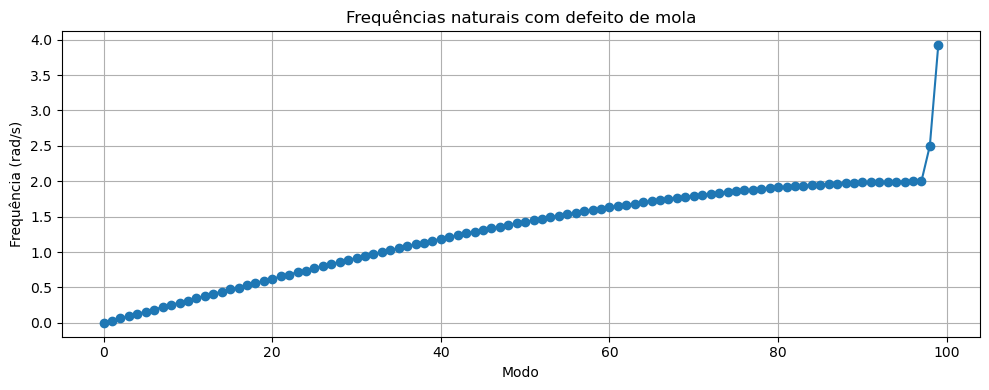

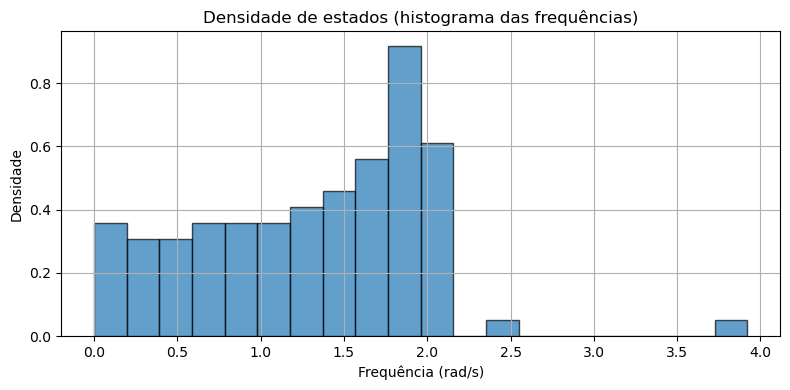

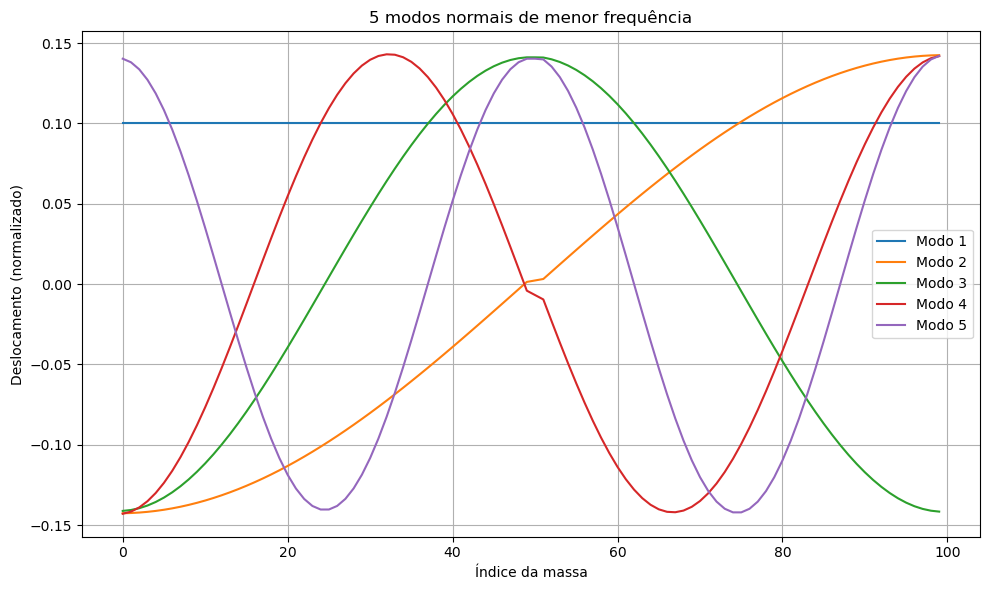

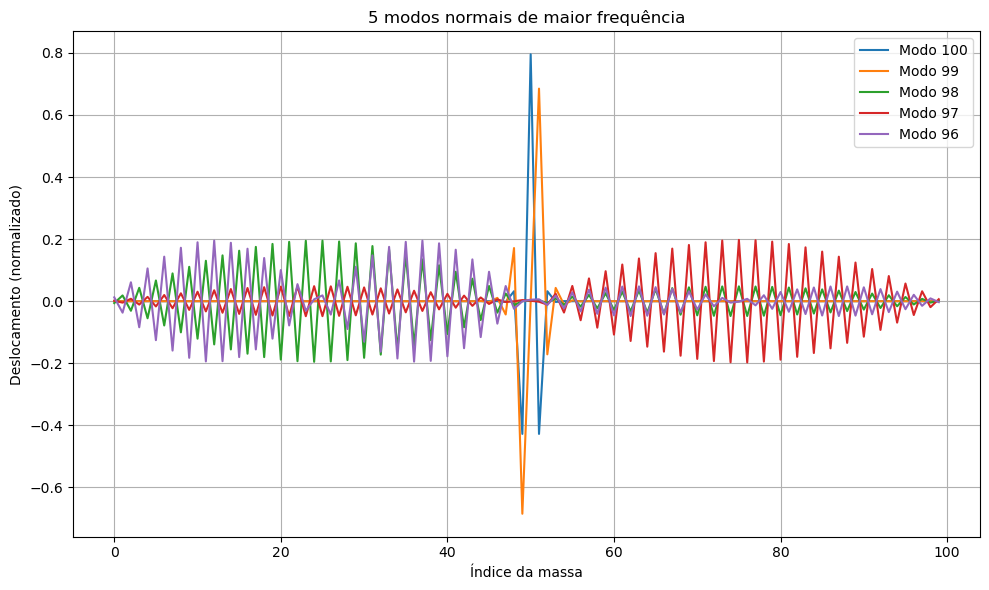

In [5]:
import numpy as np
from scipy.linalg import eig
import matplotlib.pyplot as plt

# Parâmetros
N = 100                     # Tamanho da cadeia
m = 1.0                    # Massa padrão (kg)
k = 1.0                   # Constante elástica padrão (N/m)
k2 = 5.0                   # Constante elástica do defeito (N/m)
masses = np.ones(N) * m   # Vetor de massas
k_values = np.ones(N - 1) * k  # Molas entre as massas

# Introduzindo defeito de mola no centro da cadeia
center = N // 2
k_values[center - 1] = k2
k_values[center] = k2

# Construção da matriz dinâmica D
D = np.zeros((N, N))

for i in range(N):
    if i > 0:
        D[i, i] += k_values[i - 1] / masses[i]
        D[i, i - 1] -= k_values[i - 1] / masses[i]
    if i < N - 1:
        D[i, i] += k_values[i] / masses[i]
        D[i, i + 1] -= k_values[i] / masses[i]

# Cálculo dos autovalores e autovetores
eigvals, eigvecs = eig(D)

# Filtra apenas valores reais positivos para as frequências
eigvals = np.real(eigvals)
eigvals[eigvals < 0] = 0  # Corrige pequenos negativos numéricos
frequencias = np.sqrt(eigvals)

# Ordenação
idx = np.argsort(frequencias)
frequencias = frequencias[idx]
eigvecs = np.real(eigvecs[:, idx])

# Histogramas das frequências
hist, bins = np.histogram(frequencias, bins=20, density=True)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# Impressão da matriz D formatada como tabela
np.set_printoptions(precision=2, suppress=True)

print("Matriz dinâmica D:")
for row in D:
    print('[' + '  '.join(f"{val:6.2f}" for val in row) + ']')

# Plot das frequências
plt.figure(figsize=(10, 4))
plt.plot(frequencias, 'o-')
plt.title('Frequências naturais com defeito de mola')
plt.xlabel('Modo')
plt.ylabel('Frequência (rad/s)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot da densidade de estados
plt.figure(figsize=(8, 4))
plt.bar(bin_centers, hist, width=bins[1] - bins[0], edgecolor='k', alpha=0.7)
plt.title('Densidade de estados (histograma das frequências)')
plt.xlabel('Frequência (rad/s)')
plt.ylabel('Densidade')
plt.grid(True)
plt.tight_layout()
plt.show()

# Modos normais (5 menores frequências)
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(eigvecs[:, i], label=f'Modo {i+1}')
plt.title('5 modos normais de menor frequência')
plt.xlabel('Índice da massa')
plt.ylabel('Deslocamento (normalizado)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Modos normais (5 maiores frequências)
plt.figure(figsize=(10, 6))
for i in range(1, 6):
    plt.plot(eigvecs[:, -i], label=f'Modo {N-i+1}')
plt.title('5 modos normais de maior frequência')
plt.xlabel('Índice da massa')
plt.ylabel('Deslocamento (normalizado)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
